Maidegül Gülgez - 110200015
UCK 358E: HW

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

In [ ]:
ham_veri = pd.read_csv("datatraining.csv")
ham_veri.head()

date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1

# 1-A

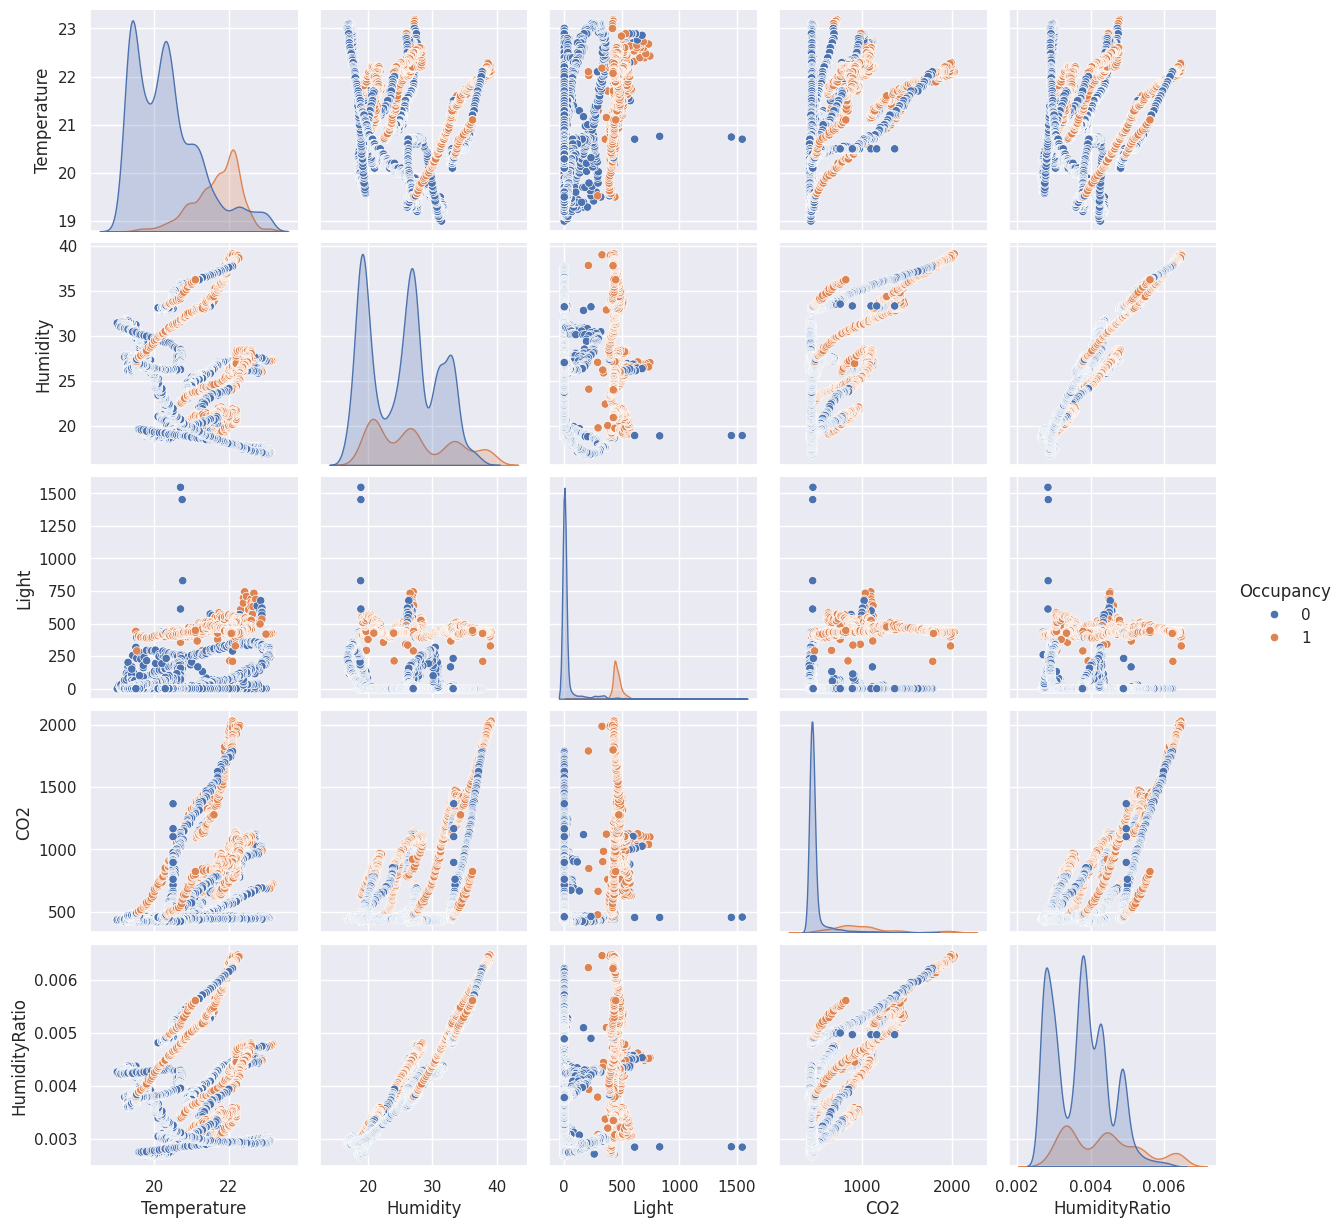

In [ ]:
sns.pairplot(ham_veri, hue='Occupancy', height=2.5);

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(ham_veri.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '2015-02-04 17:51:00'

<Figure size 1000x800 with 0 Axes>

In the above code, date causes problems and it does not appear in pairplots, so some manipulations must be made to date:

In [ ]:
from sklearn.model_selection import train_test_split

X = ham_veri.drop(["Occupancy"], axis=1)
y = ham_veri[["Occupancy"]]


X['date'] = pd.to_datetime(X['date'])
X['hour'] = X['date'].dt.hour
X['dayofweek'] = X['date'].dt.dayofweek
X = X.drop('date', axis=1)
X.head()

Temperature  Humidity  Light     CO2  HumidityRatio  hour  dayofweek
1        23.18   27.2720  426.0  721.25       0.004793    17          2
2        23.15   27.2675  429.5  714.00       0.004783    17          2
3        23.15   27.2450  426.0  713.50       0.004779    17          2
4        23.15   27.2000  426.0  708.25       0.004772    17          2
5        23.10   27.2000  426.0  704.50       0.004757    17          2

Now we can graph this new data:

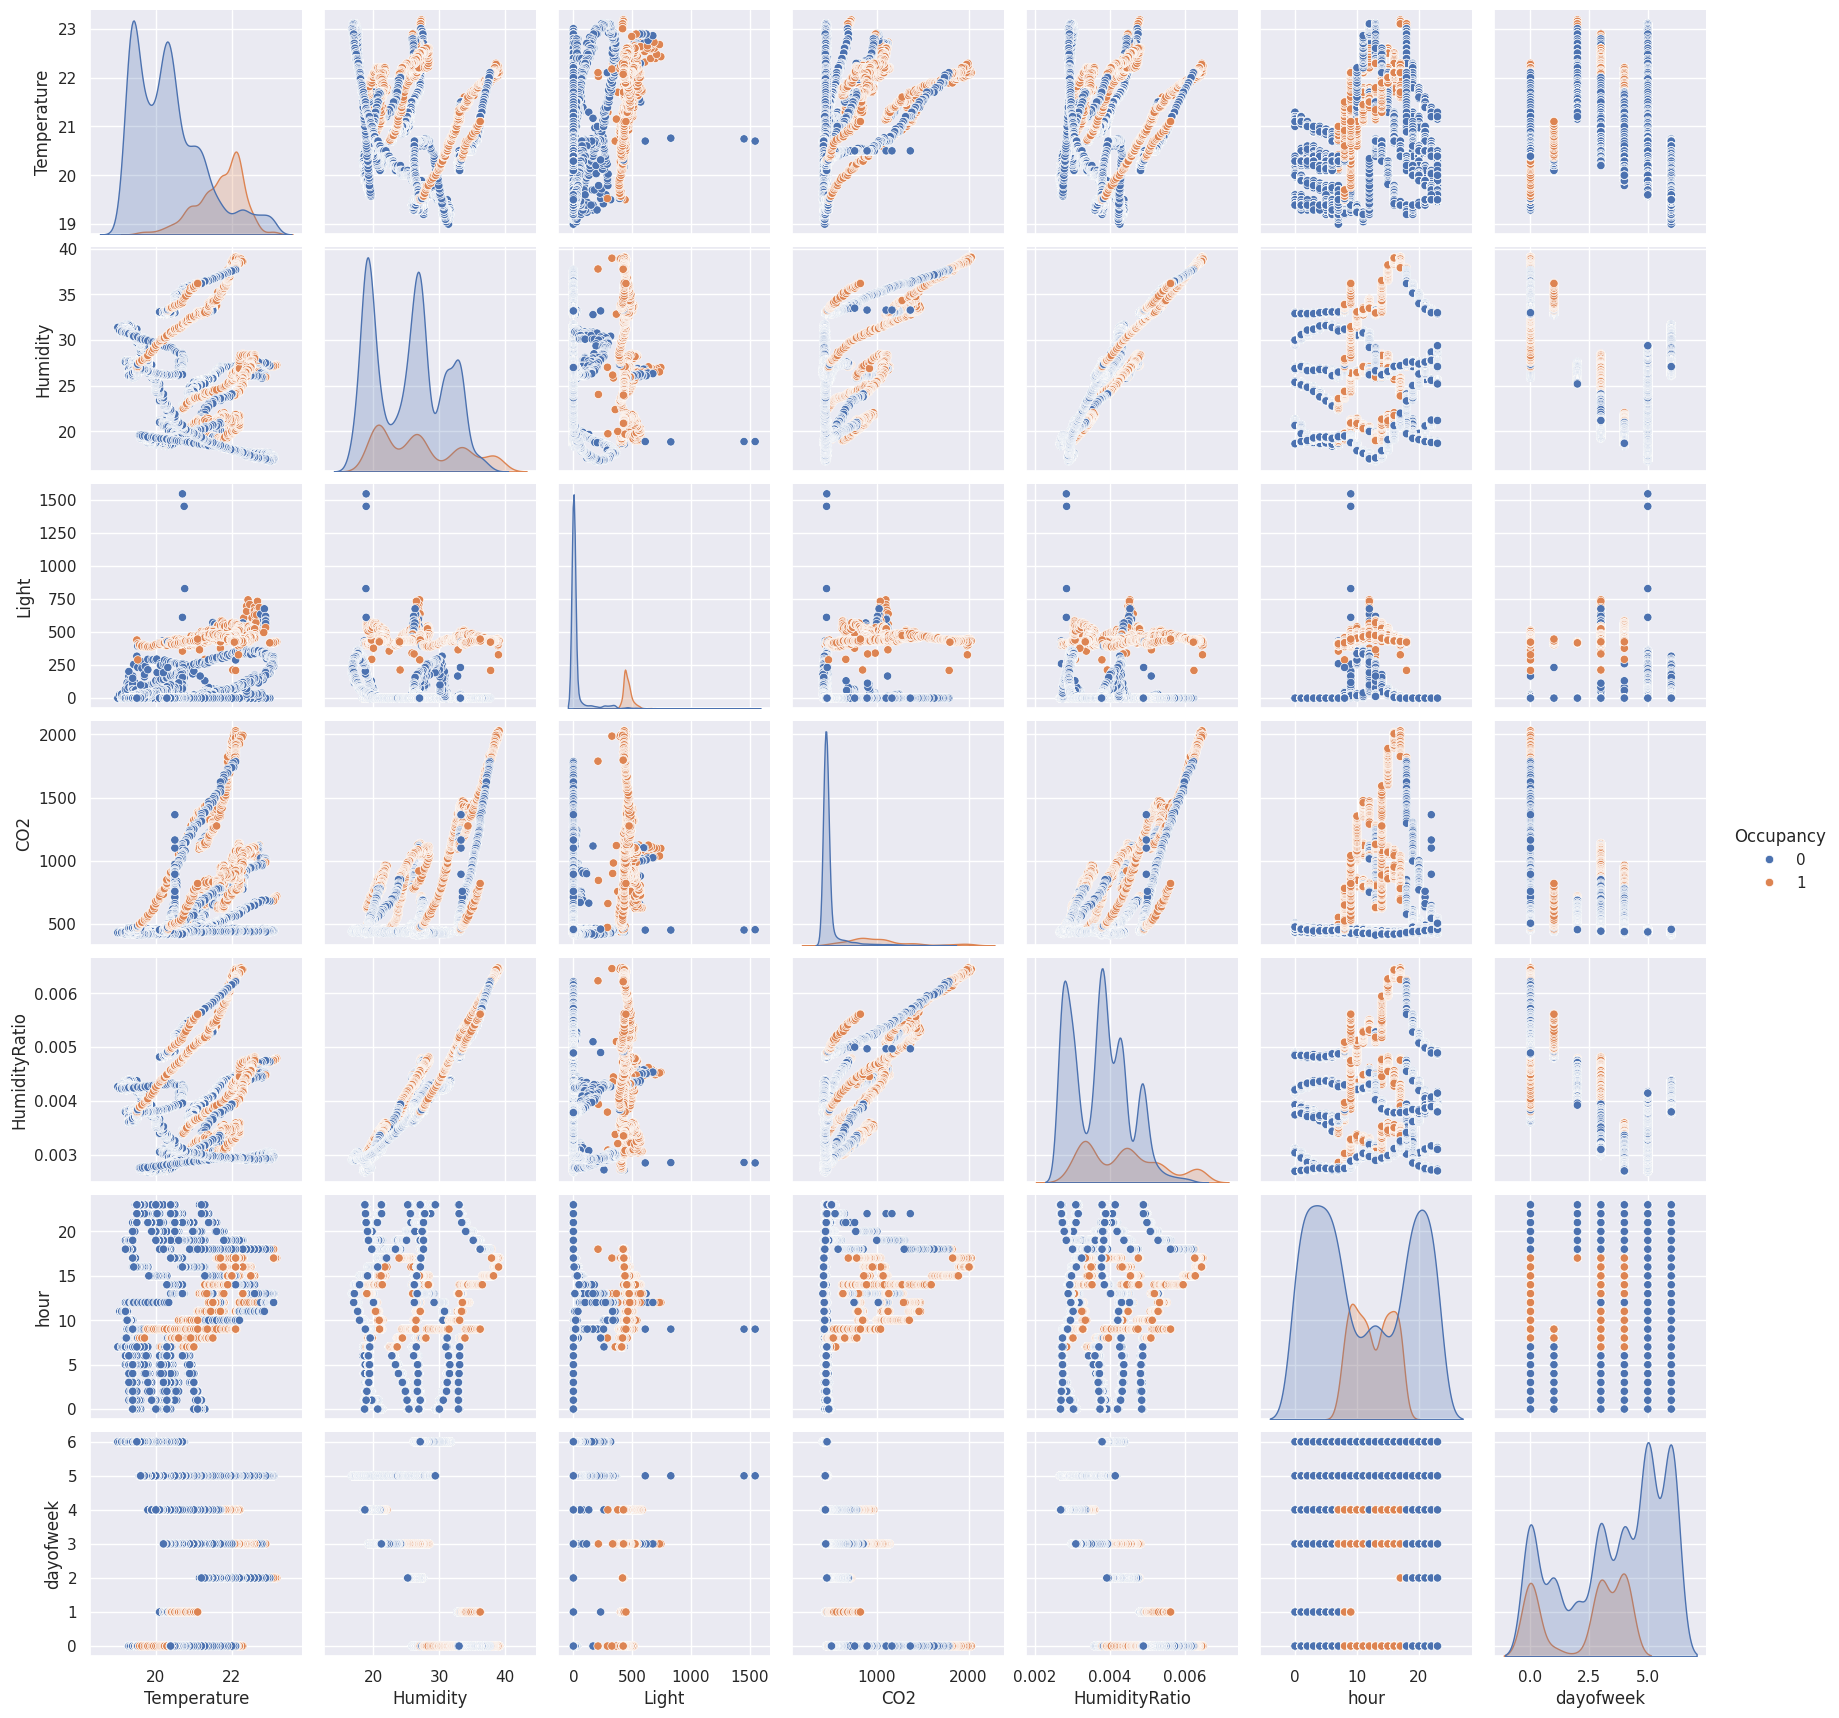

In [ ]:
yeni_veri = pd.concat([X, y], axis=1)
sns.pairplot(yeni_veri, hue='Occupancy', height=2.5);

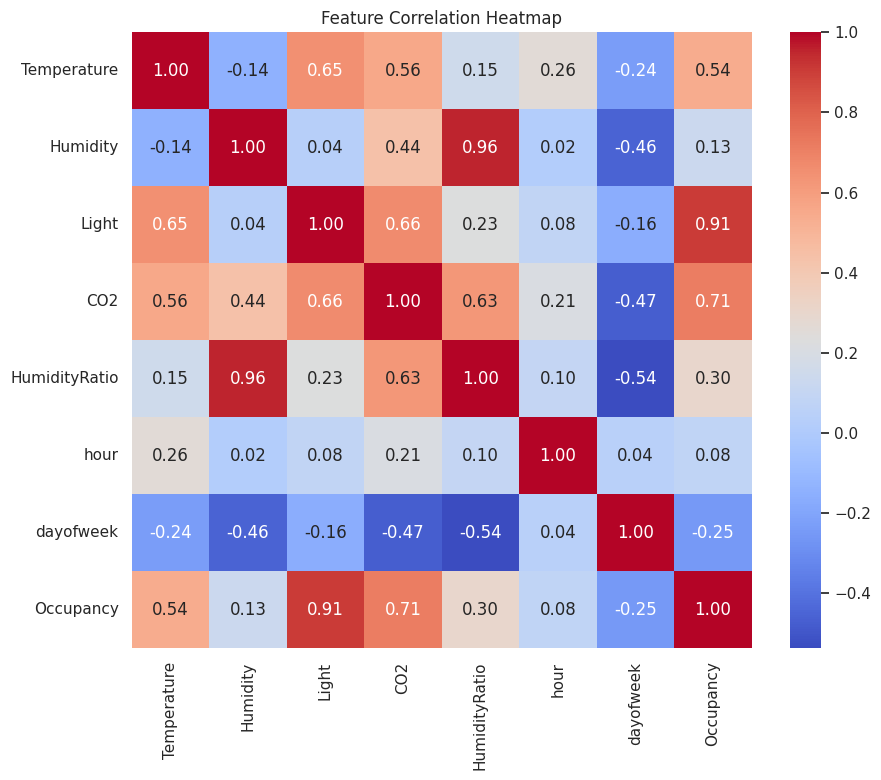

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(yeni_veri.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

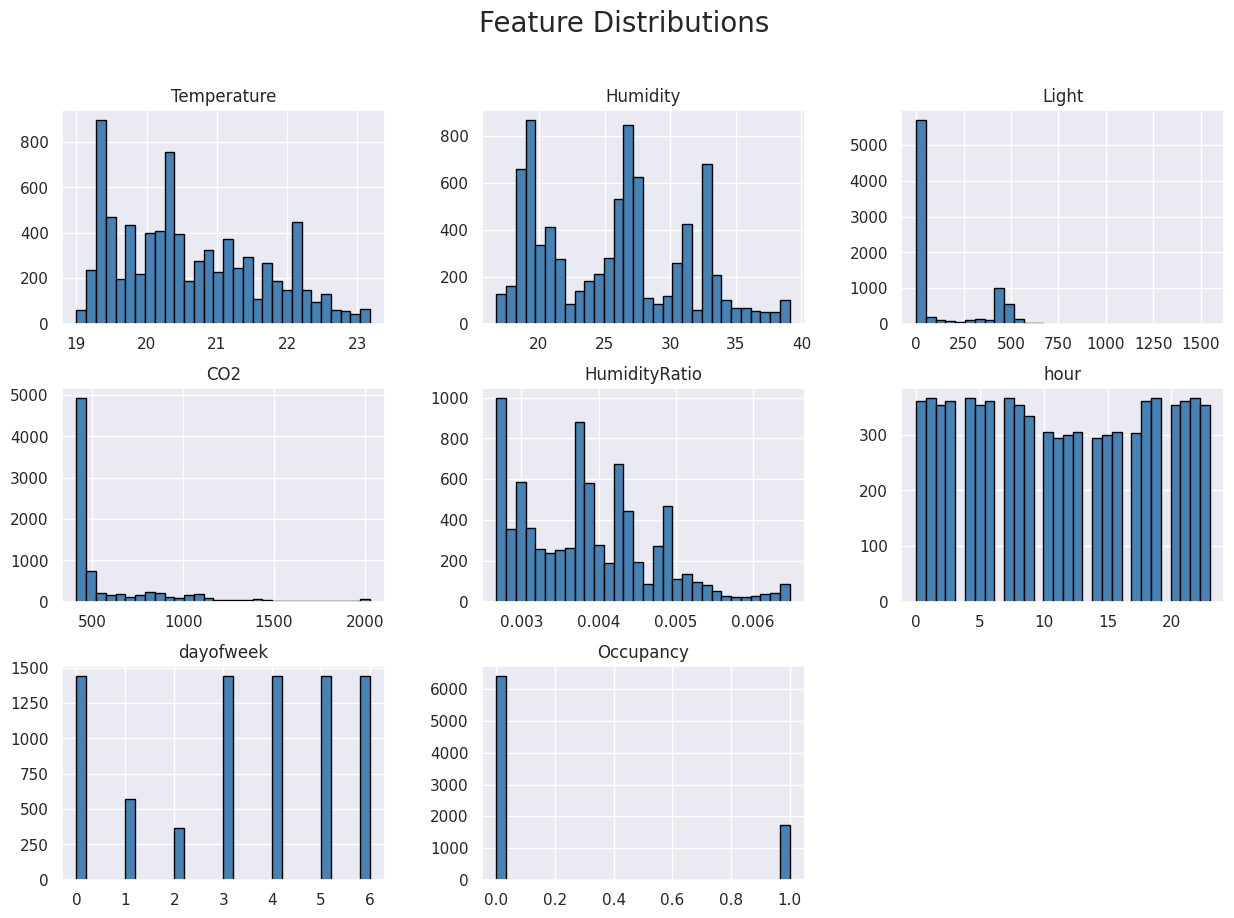

In [ ]:
yeni_veri.hist(bins=30, figsize=(15,10), color='steelblue', edgecolor='black')
plt.suptitle('Feature Distributions', size=20)
plt.show()

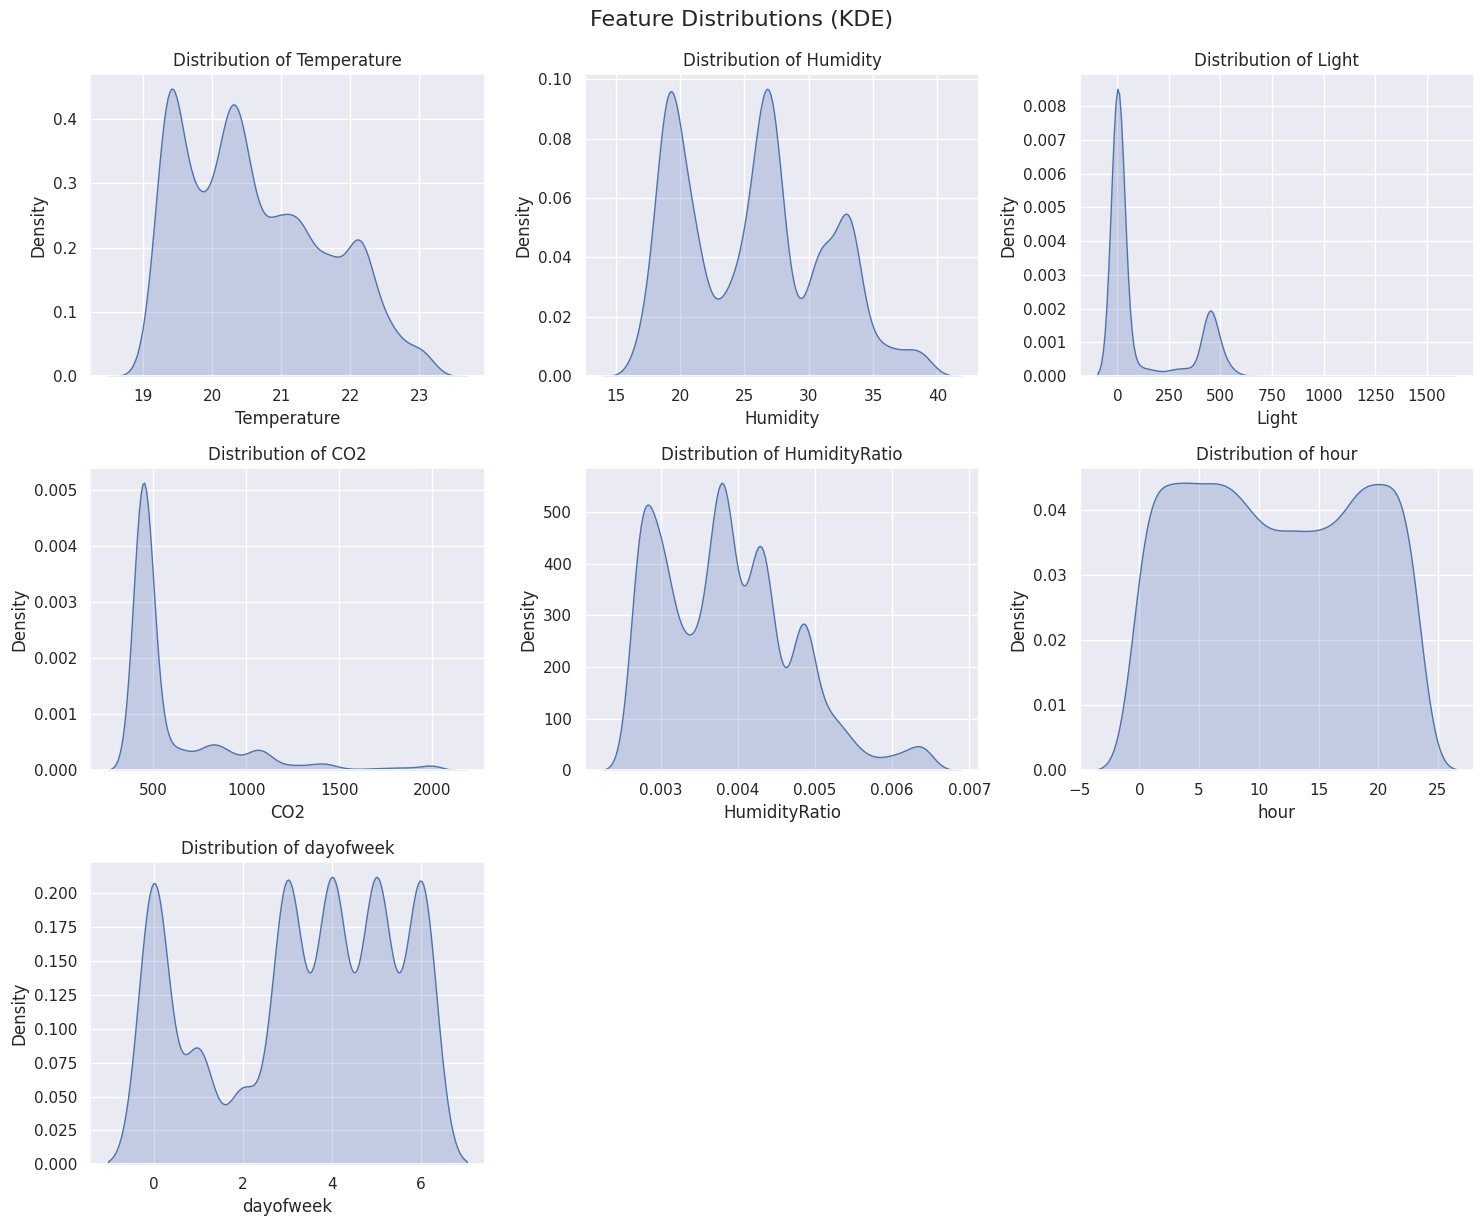

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(X.columns)

n_cols = 3
n_rows = math.ceil(num_cols / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, column in enumerate(X.columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.kdeplot(data=X, x=column, fill=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.suptitle('Feature Distributions (KDE)', fontsize=16, y=1.02)
plt.show()

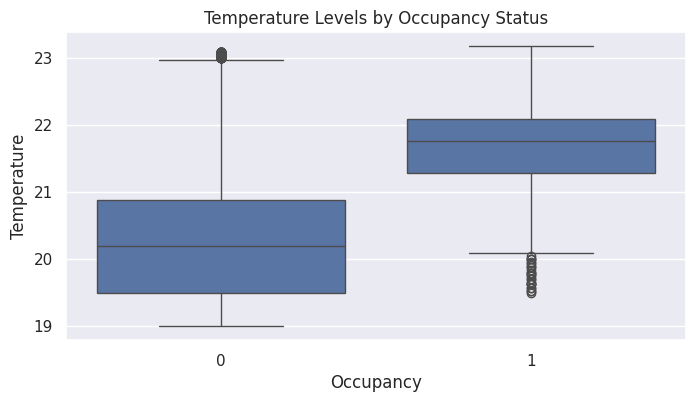

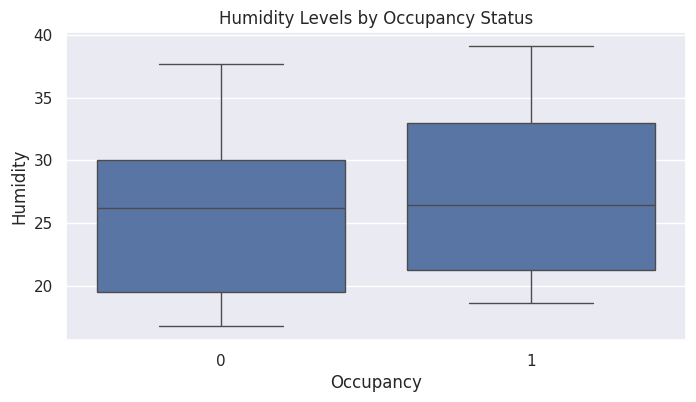

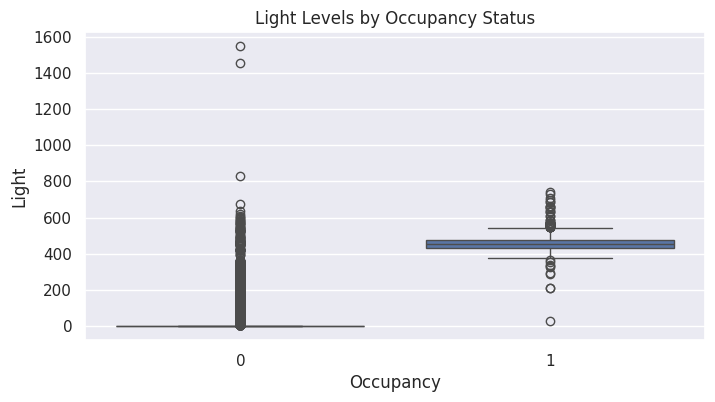

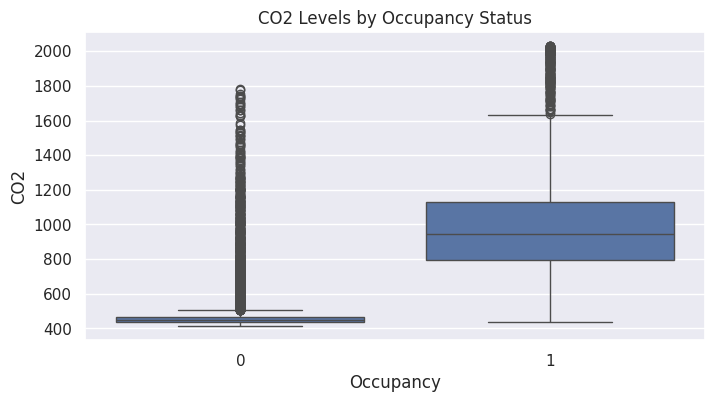

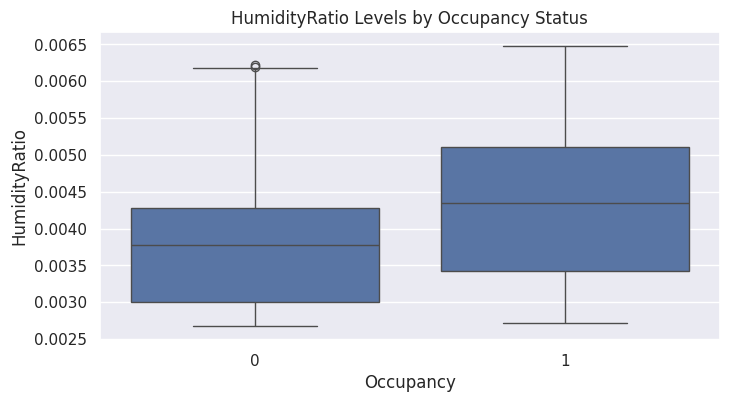

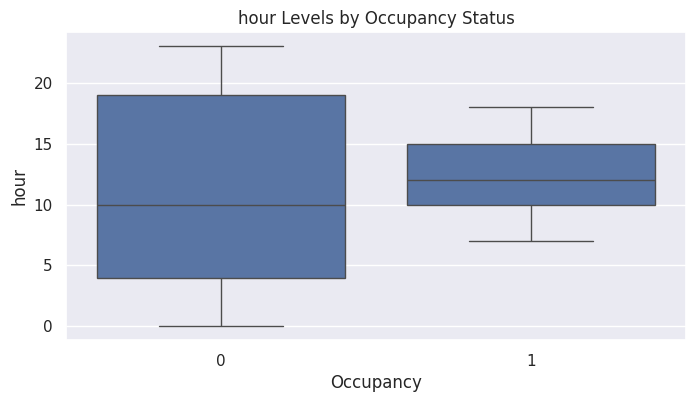

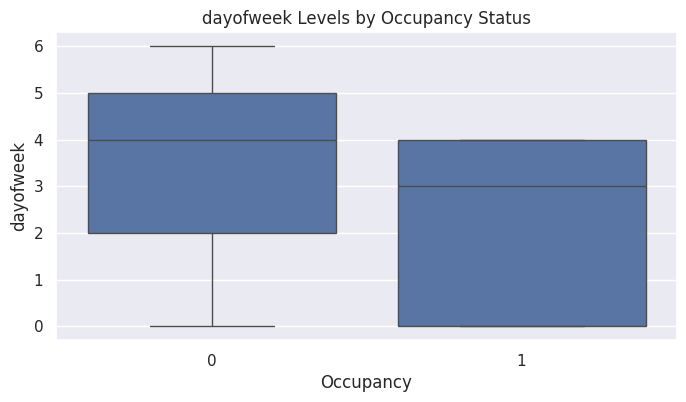

In [ ]:
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=yeni_veri, x='Occupancy', y=column)
    plt.title(f'{column} Levels by Occupancy Status')
    plt.show()

# 1-B

In [ ]:
temiz_veri = yeni_veri[(yeni_veri['CO2'] <= 2500) & (yeni_veri['Light'] <= 2000)]

print(f"Temizlenmiş veri boyutu: {temiz_veri.shape}")

Temizlenmiş veri boyutu: (8143, 8)


#1-C

In [ ]:
print("Empty Values:")
print(temiz_veri.isna().sum())

Empty Values:
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
hour             0
dayofweek        0
Occupancy        0
dtype: int64


In [ ]:
temiz_veri.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
hour             0
dayofweek        0
Occupancy        0
dtype: int64

In [ ]:
# Counting '?' and empty strings (for example) throughout the dataframe:
print((temiz_veri == '?').sum(), "\n")
print((temiz_veri == '').sum(), "\n")
print((temiz_veri == '-').sum(), "\n")

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
hour             0
dayofweek        0
Occupancy        0
dtype: int64 

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
hour             0
dayofweek        0
Occupancy        0
dtype: int64 

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
hour             0
dayofweek        0
Occupancy        0
dtype: int64 



#1-D
Feature and target data are separated from clean data:

In [ ]:
from sklearn.model_selection import train_test_split

X = temiz_veri.drop(["Occupancy"], axis=1)
y = temiz_veri[["Occupancy"]]

#1-E
new feature added:

In [ ]:
# 1. CO2 per hor
temiz_veri['CO2_per_hour'] = temiz_veri['CO2'] / (temiz_veri['hour'] + 1)

# 2. Whether there are working hours
temiz_veri['IsItWorkingHour'] = temiz_veri['hour'].apply(lambda h: 1 if 8 <= h <= 18 else 0)

print(temiz_veri[['CO2', 'hour', 'CO2_per_hour', 'IsItWorkingHour']].head())

      CO2  hour  CO2_per_hour  IsItWorkingHour
1  721.25    17     40.069444                1
2  714.00    17     39.666667                1
3  713.50    17     39.638889                1
4  708.25    17     39.347222                1
5  704.50    17     39.138889                1


In [ ]:
temiz_veri.head()

Temperature  Humidity  Light     CO2  HumidityRatio  hour  dayofweek  \
1        23.18   27.2720  426.0  721.25       0.004793    17          2   
2        23.15   27.2675  429.5  714.00       0.004783    17          2   
3        23.15   27.2450  426.0  713.50       0.004779    17          2   
4        23.15   27.2000  426.0  708.25       0.004772    17          2   
5        23.10   27.2000  426.0  704.50       0.004757    17          2   

   Occupancy  CO2_per_hour  IsItWorkingHour  
1          1     40.069444                1  
2          1     39.666667                1  
3          1     39.638889                1  
4          1     39.347222                1  
5          1     39.138889                1

#2-A

Nonlinear transformatin

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8143, 7), (8143, 1), (5700, 7), (5700, 1), (2443, 7), (2443, 1))

# ***NOTE:*** The data called test data in the code is actually validation data. It is separated from train data. Test-1 and test-2 data are not used in model execution.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

#-------------LOGISTIC REGRESSION--------------

#2-b - building model || 2-c tuning hyperparameters and calculation of metrics

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

En iyi parametreler: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.9885964912280701
Test Accuracy: 0.9881293491608678
Precision: 0.9511754068716094
Recall: 0.9962121212121212


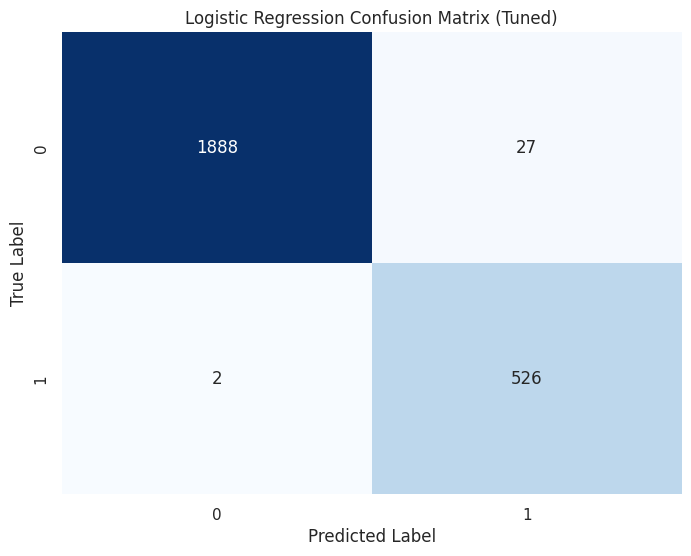


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1915
           1       0.95      1.00      0.97       528

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

param_grid_logistic_regression = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


base_model = LogisticRegression(max_iter=500)
grid = GridSearchCV(base_model, param_grid_logistic_regression, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

logistic_model = grid.best_estimator_
print("En iyi parametreler:", grid.best_params_)

y_train_pred_logistic_regression = logistic_model.predict(X_train)
y_test_pred_logistic_regression = logistic_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_logistic_regression))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_logistic_regression))
print("Precision:", precision_score(y_test, y_test_pred_logistic_regression))
print("Recall:", recall_score(y_test, y_test_pred_logistic_regression))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_logistic_regression), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_logistic_regression))

#2-d - feature importance

Logistic Regression için doğrudan feature_importance_ özelliği yoktur, ancak her bir özelliğin ağırlığı (coef_) üzerinden önem derecesi hesaplanabilir. Ağırlıkların mutlak değeri yüksekse, o özellik karar üzerinde daha etkilidir.

Aşağıdaki kodu kullanarak Logistic Regression modelin için feature importance grafiğini oluşturabilirsin:

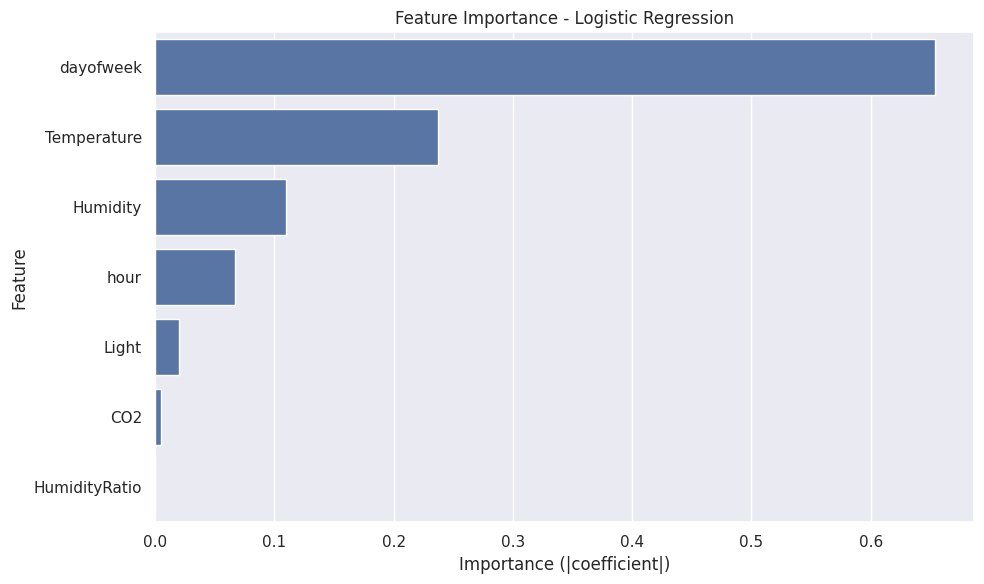

In [ ]:
importance = np.abs(logistic_model.coef_[0])

feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Importance (|coefficient|)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Logistic Regression modelinde, her bir özelliğin sınıflandırma kararına etkisini ifade eden katsayıların mutlak değeri alınarak önem derecesi hesaplanmıştır. Bu değerler sıralanarak modelin kararlarında hangi özniteliklerin daha baskın rol oynadığı görselleştirilmiştir.



# 2-e overfitting ve underfitting

In [ ]:
train_acc_logistic_regression = accuracy_score(y_train, y_train_pred_logistic_regression)
test_acc_logistic_regression = accuracy_score(y_test,y_test_pred_logistic_regression)

diff = abs(train_acc_logistic_regression - test_acc_logistic_regression)
if train_acc_logistic_regression < 0.85 and test_acc_logistic_regression < 0.85:
    print("Underfitting: The model did not learn the data enough.")
elif train_acc_logistic_regression > 0.85 and diff > 0.1:
    print("Overfitting: The model fits the training very well but does not generalize.")
else:
    print("The model is balanced: Neither overfitting nor underfitting is observed.")

The model is balanced: Neither overfitting nor underfitting is observed.


#2-f || feature combining

In [ ]:
X_full = temiz_veri.drop("Occupancy", axis=1)
y_full = temiz_veri["Occupancy"]

feature_sets = {
    "Set 1": ['Temperature', 'Humidity'],
    "Set 2": ['Temperature', 'Humidity', 'Light'],
    "Set 3": ['Temperature', 'Humidity', 'Light', 'hour', 'dayofweek'],
    "Set 4": list(X_full.columns)
}

results = []

for name, features in feature_sets.items():
    X = X_full[features]
    y = y_full

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Feature Set": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
print(df_results)


  Feature Set  Accuracy  Precision    Recall
0       Set 1  0.820303   0.613232  0.456439
1       Set 2  0.986901   0.947653  0.994318
2       Set 3  0.987720   0.951087  0.994318
3       Set 4  0.982808   0.950000  0.971591


In experiments with different feature combinations, adding the Light and Hour variables to the model increased the accuracy rate. This shows that these variables carry meaningful information in terms of classification. However, the risk of overfitting should be taken into consideration when more variables are added.

#-----------NAİVE BAYES--------------------

#2-b - building model || 2-c tuning hyperparameters and calculation of metrics

En iyi parametre: {'var_smoothing': 1e-06}
Train Accuracy: 0.9766666666666667
Test Accuracy: 0.9746213671715105
Precision: 0.898972602739726
Recall: 0.9943181818181818


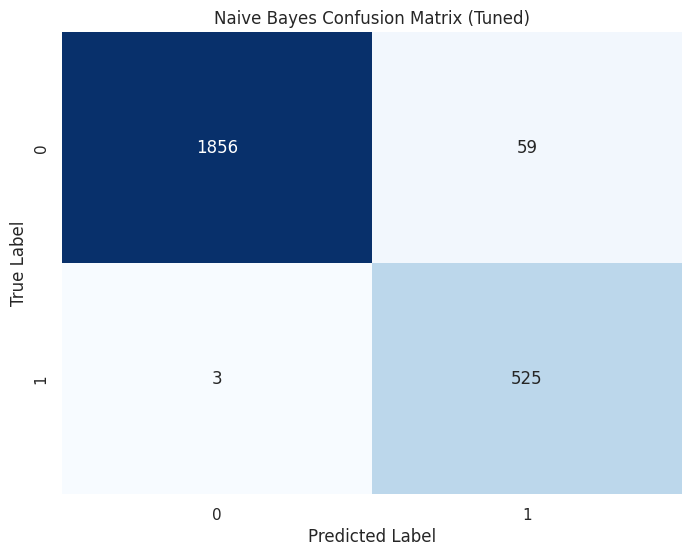


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1915
           1       0.90      0.99      0.94       528

    accuracy                           0.97      2443
   macro avg       0.95      0.98      0.96      2443
weighted avg       0.98      0.97      0.98      2443



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

param_grid_naive_bayes = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

nb = GaussianNB()
grid = GridSearchCV(nb, param_grid_naive_bayes, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

naive_model = grid.best_estimator_
print("En iyi parametre:", grid.best_params_)

y_train_pred_naive = naive_model.predict(X_train)
y_test_pred_naive = naive_model.predict(X_test)


print("Train Accuracy:", accuracy_score(y_train, y_train_pred_naive))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_naive))
print("Precision:", precision_score(y_test, y_test_pred_naive))
print("Recall:", recall_score(y_test, y_test_pred_naive))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_naive), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_naive))

#2-d feature importance

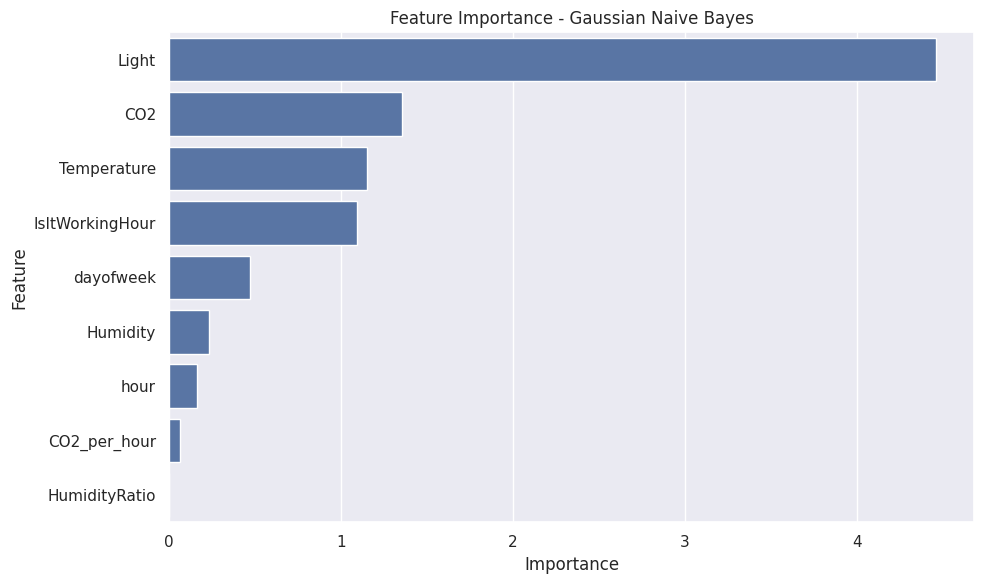

In [ ]:
means = naive_model.theta_
variances = naive_model.var_

feature_names = X_train.columns

importance_scores = np.abs(means[0] - means[1]) / np.sqrt(variances[0] + variances[1])

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Gaussian Naive Bayes')
plt.tight_layout()
plt.show()

#2-e underfitting overfitting

In [ ]:
train_acc_naive = accuracy_score(y_train, y_train_pred_naive)
test_acc_naive= accuracy_score(y_test,y_test_pred_naive)

diff_navie = abs(train_acc_naive - test_acc_naive)
if train_acc_naive < 0.85 and test_acc_naive < 0.85:
    print("Underfitting: The model did not learn the data enough.")
elif train_acc_naive > 0.85 and diff_navie > 0.1:
    print("Overfitting: The model fits the training very well but does not generalize.")
else:
    print("The model is balanced: Neither overfitting nor underfitting is observed.")

The model is balanced: Neither overfitting nor underfitting is observed.


#feature combination

In [ ]:
X_full = temiz_veri.drop("Occupancy", axis=1)
y_full = temiz_veri["Occupancy"]

feature_sets = {
    "Set 1": ['Temperature', 'Humidity'],
    "Set 2": ['Temperature', 'Humidity', 'Light'],
    "Set 3": ['Temperature', 'Humidity', 'Light', 'hour', 'dayofweek'],
    "Set 4": list(X_full.columns)  # Tüm özellikler
}

results = []

from sklearn.naive_bayes import GaussianNB

for name, features in feature_sets.items():
    X = X_full[features]
    y = y_full

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Feature Set": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
print(df_results)

  Feature Set  Accuracy  Precision    Recall
0       Set 1  0.823987   0.601240  0.551136
1       Set 2  0.973803   0.894558  0.996212
2       Set 3  0.972984   0.891525  0.996212
3       Set 4  0.968481   0.890815  0.973485


#-------------K Nearest--------------------

#2-b - building model || 2-c tuning hyperparameters and calculation of metrics

---



En iyi parametreler: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Train accuracy score: 1.0000
Test accuracy score: 0.9922
Model precision score: 0.9704
Model recall score: 0.9943


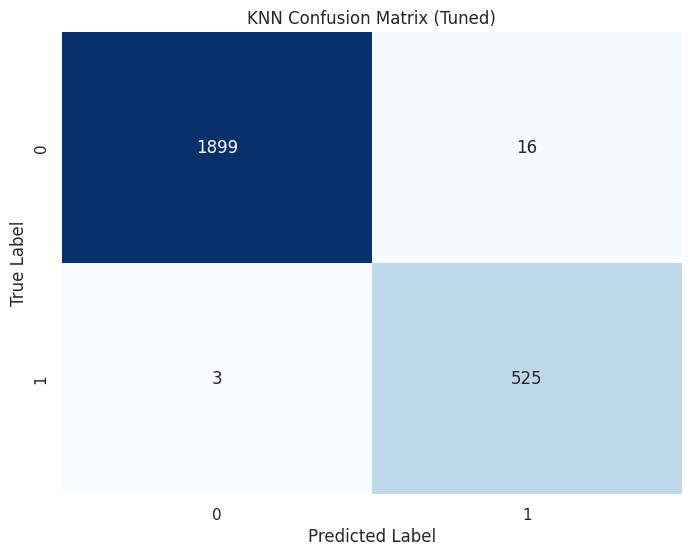


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1915
           1       0.97      0.99      0.98       528

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

k_nearest_model = grid.best_estimator_
print("En iyi parametreler:", grid.best_params_)

y_train_pred_knearest = k_nearest_model.predict(X_train)
y_test_pred_knearest = k_nearest_model.predict(X_test)

print('Train accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_train_pred_knearest)))
print('Test accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_test_pred_knearest)))
print('Model precision score: {0:0.4f}'.format(precision_score(y_test, y_test_pred_knearest)))
print('Model recall score: {0:0.4f}'.format(recall_score(y_test, y_test_pred_knearest)))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_knearest), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_knearest))


#2-d feature importance

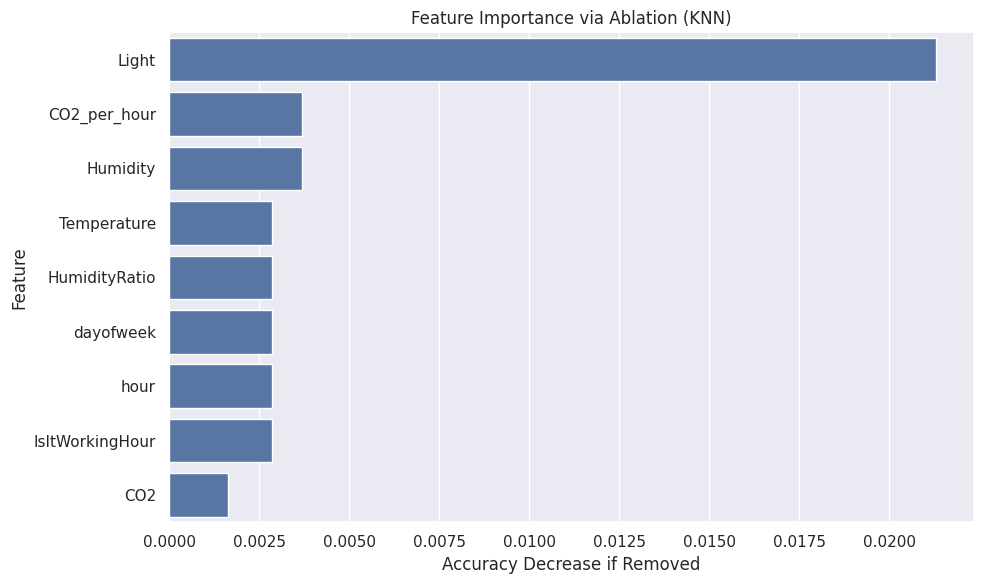

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

baseline_accuracy = accuracy_score(y_test, k_nearest_model.predict(X_test))
feature_impact = []

for feature in X_test.columns:
    X_test_dropped = X_test.drop(columns=[feature])
    X_train_dropped = X_train.drop(columns=[feature])

    temp_model = KNeighborsClassifier(n_neighbors=k_nearest_model.n_neighbors)
    temp_model.fit(X_train_dropped, y_train)

    acc = accuracy_score(y_test, temp_model.predict(X_test_dropped))
    drop = baseline_accuracy - acc

    feature_impact.append({'Feature': feature, 'Accuracy Drop': drop})

impact_df = pd.DataFrame(feature_impact).sort_values(by='Accuracy Drop', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy Drop', y='Feature', data=impact_df)
plt.title('Feature Importance via Ablation (KNN)')
plt.xlabel('Accuracy Decrease if Removed')
plt.tight_layout()
plt.show()

#2-e underfitting overfitting

In [ ]:
train_acc_knearest = accuracy_score(y_train, y_train_pred_knearest)
test_acc_knearest = accuracy_score(y_test,y_test_pred_knearest)

diff_knearest = abs(train_acc_knearest - test_acc_knearest)
if train_acc_knearest < 0.85 and test_acc_knearest < 0.85:
    print("Underfitting: The model did not learn the data enough.")
elif train_acc_knearest > 0.85 and diff_knearest > 0.1:
    print("Overfitting: The model fits the training very well but does not generalize.")
else:
    print("The model is balanced: Neither overfitting nor underfitting is observed.")

The model is balanced: Neither overfitting nor underfitting is observed.


In [ ]:
X_full = temiz_veri.drop("Occupancy", axis=1)
y_full = temiz_veri["Occupancy"]

feature_sets = {
    "Set 1": ['Temperature', 'Humidity'],
    "Set 2": ['Temperature', 'Humidity', 'Light'],
    "Set 3": ['Temperature', 'Humidity', 'Light', 'hour', 'dayofweek'],
    "Set 4": list(X_full.columns)
}

results = []

from sklearn.neighbors import KNeighborsClassifier
for name, features in feature_sets.items():
    X = X_full[features]
    y = y_full

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = KNeighborsClassifier(n_neighbors=k_nearest_model.n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Feature Set": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
print(df_results)

  Feature Set  Accuracy  Precision    Recall
0       Set 1  0.966025   0.935421  0.905303
1       Set 2  0.987311   0.957643  0.984848
2       Set 3  0.986083   0.957407  0.979167
3       Set 4  0.989357   0.961397  0.990530


#--------------decision tree----------------------

#2-b - building model || 2-c tuning hyperparameters and calculation of metrics

En iyi hiperparametreler: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Train accuracy score: 0.9977
Test accuracy score: 0.9894
Model precision score: 0.9700
Model recall score: 0.9811


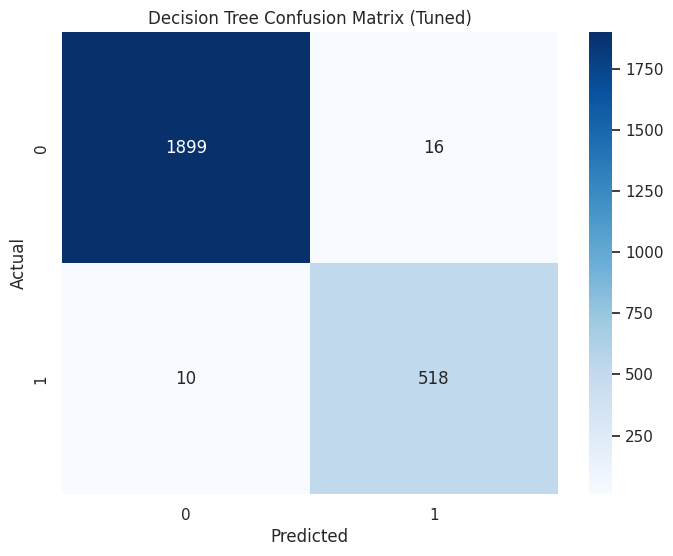


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1915
           1       0.97      0.98      0.98       528

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



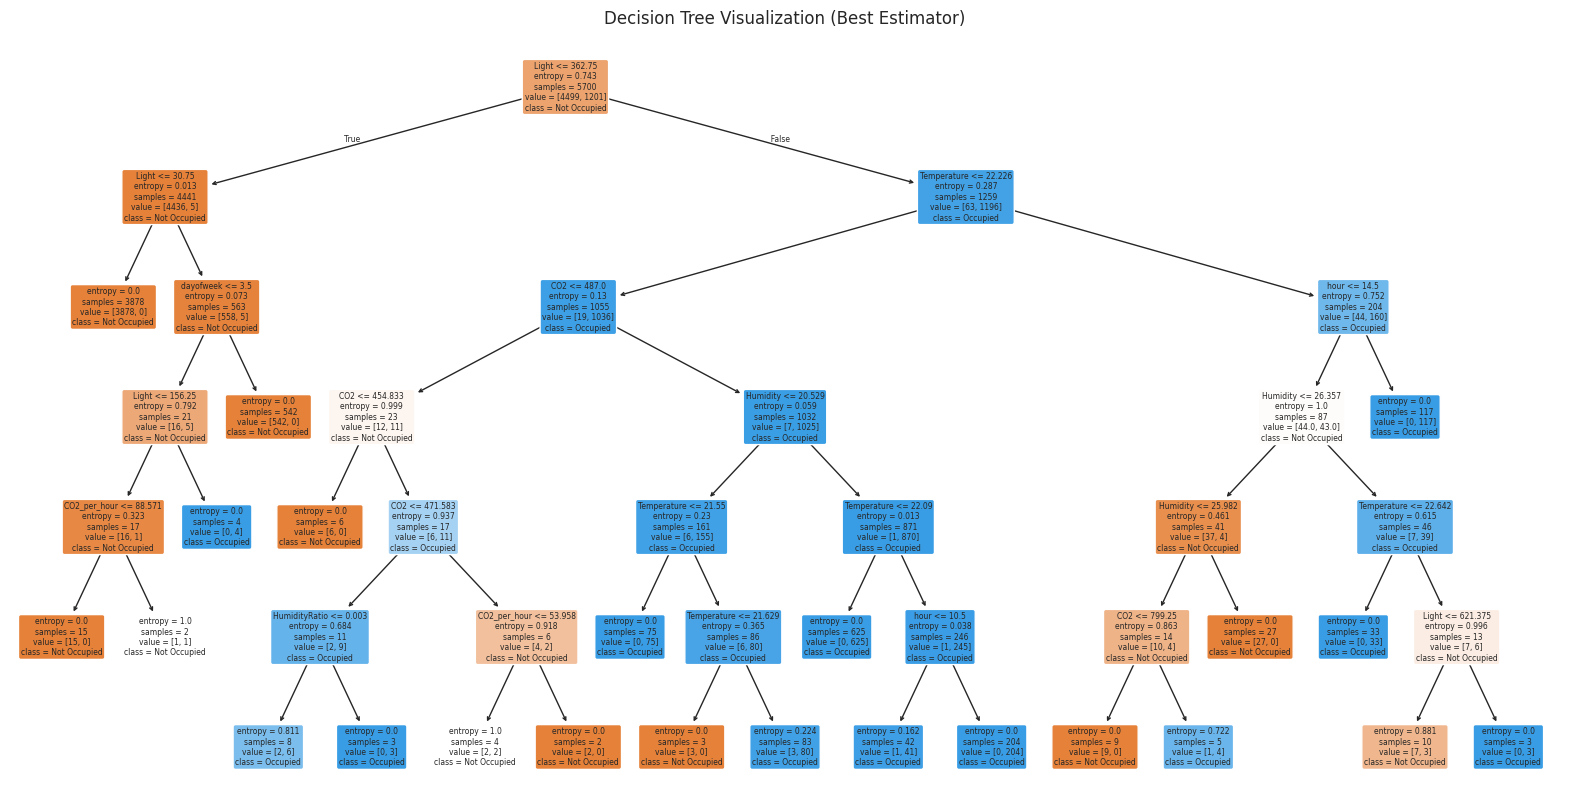

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

decision_tree_model = grid.best_estimator_
print("En iyi hiperparametreler:", grid.best_params_)

y_train_pred_decision_tree = decision_tree_model.predict(X_train)
y_test_pred_decision_tree = decision_tree_model.predict(X_test)

print('Train accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_train_pred_decision_tree)))
print('Test accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_test_pred_decision_tree)))
print('Model precision score: {0:0.4f}'.format(precision_score(y_test, y_test_pred_decision_tree)))
print('Model recall score: {0:0.4f}'.format(recall_score(y_test, y_test_pred_decision_tree)))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_decision_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_decision_tree))

plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, feature_names=X_train.columns, class_names=['Not Occupied', 'Occupied'], filled=True, rounded=True)
plt.title("Decision Tree Visualization (Best Estimator)")
plt.show()

#2-d feature importance

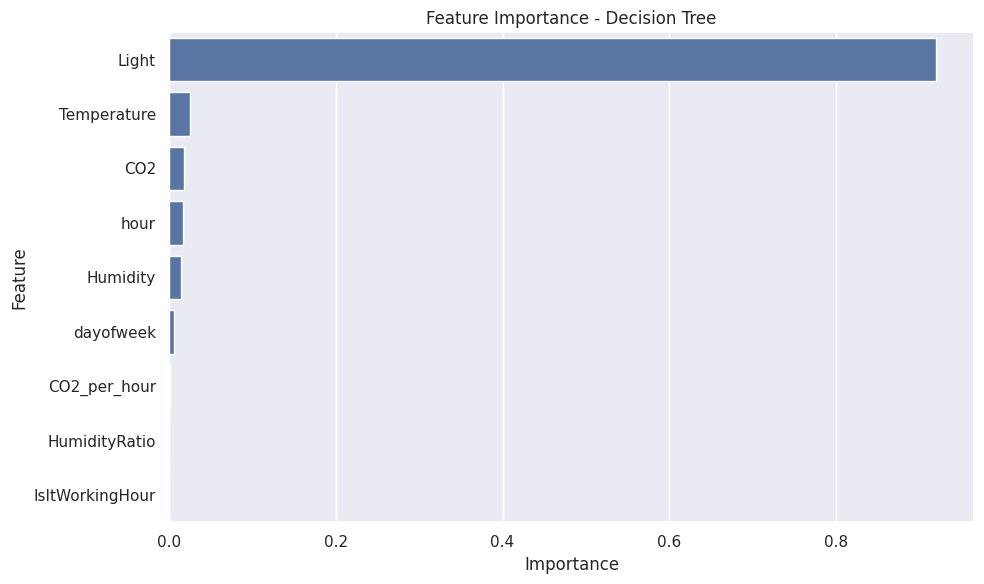

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = decision_tree_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#2-e overfitting underfitting

In [ ]:
train_acc_decisiontree = accuracy_score(y_train, y_train_pred_decision_tree)
test_acc_decisiontree = accuracy_score(y_test,y_test_pred_decision_tree)

diff_decisiontree = abs(train_acc_decisiontree - test_acc_decisiontree)
if train_acc_decisiontree < 0.85 and test_acc_decisiontree < 0.85:
    print("Underfitting: The model did not learn the data enough.")
elif train_acc_decisiontree > 0.85 and diff_decisiontree > 0.1:
    print("Overfitting: The model fits the training very well but does not generalize.")
else:
    print("The model is balanced: Neither overfitting nor underfitting is observed.")

The model is balanced: Neither overfitting nor underfitting is observed.


In [ ]:
X_full = temiz_veri.drop("Occupancy", axis=1)
y_full = temiz_veri["Occupancy"]

feature_sets = {
    "Set 1": ['Temperature', 'Humidity'],
    "Set 2": ['Temperature', 'Humidity', 'Light'],
    "Set 3": ['Temperature', 'Humidity', 'Light', 'hour', 'dayofweek'],
    "Set 4": list(X_full.columns)  # Tüm özellikler
}

results = []


for name, features in feature_sets.items():
    X = X_full[features]
    y = y_full

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = DecisionTreeClassifier(random_state=42, **grid.best_params_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Feature Set": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
print(df_results)

  Feature Set  Accuracy  Precision    Recall
0       Set 1  0.930413   0.816254  0.875000
1       Set 2  0.991813   0.972119  0.990530
2       Set 3  0.992632   0.973978  0.992424
3       Set 4  0.989357   0.970037  0.981061


#--------------------Random Forest-------------------

#2-b - building model || 2-c tuning hyperparameters and calculation of metrics:


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Parametre grid'i
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Model ve GridSearch
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# En iyi modeli al
random_forest_model = grid.best_estimator_
print("En iyi hiperparametreler:", grid.best_params_)

# Tahmin
y_train_pred_random_forest = random_forest_model.predict(X_train)
y_test_pred_random_forest = random_forest_model.predict(X_test)

# Performans metrikleri
print('Train accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_train_pred_random_forest)))
print('Test accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_test_pred_random_forest)))
print('Model precision score: {0:0.4f}'.format(precision_score(y_test, y_test_pred_random_forest)))
print('Model recall score: {0:0.4f}'.format(recall_score(y_test, y_test_pred_random_forest)))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_random_forest), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_random_forest))

KeyboardInterrupt: 

I didn't do any hyperparameter tuning because this took too long to work



Train accuracy score: 1.0000
Test accuracy score: 0.9930
Model precision score: 0.9776
Model recall score: 0.9905


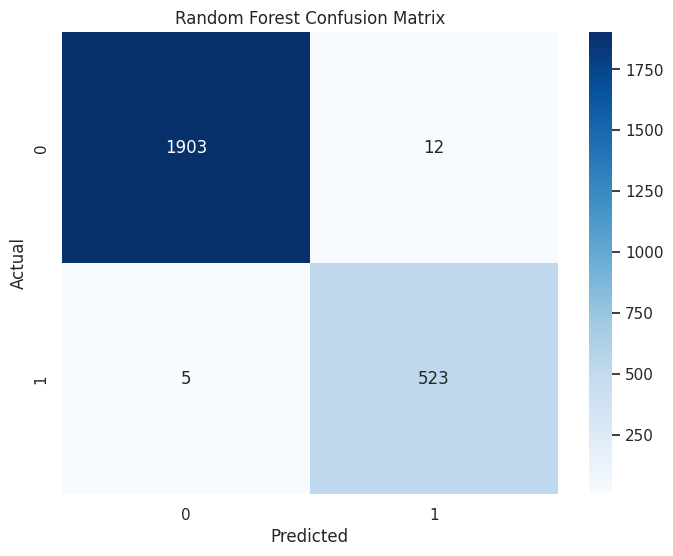


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1915
           1       0.98      0.99      0.98       528

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_train_pred_random_forest = random_forest_model.predict(X_train)
y_test_pred_random_forest = random_forest_model.predict(X_test)


print('Train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_random_forest)))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_random_forest)))
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, y_test_pred_random_forest)))
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, y_test_pred_random_forest)))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_random_forest), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_random_forest))

#2-d feature importance

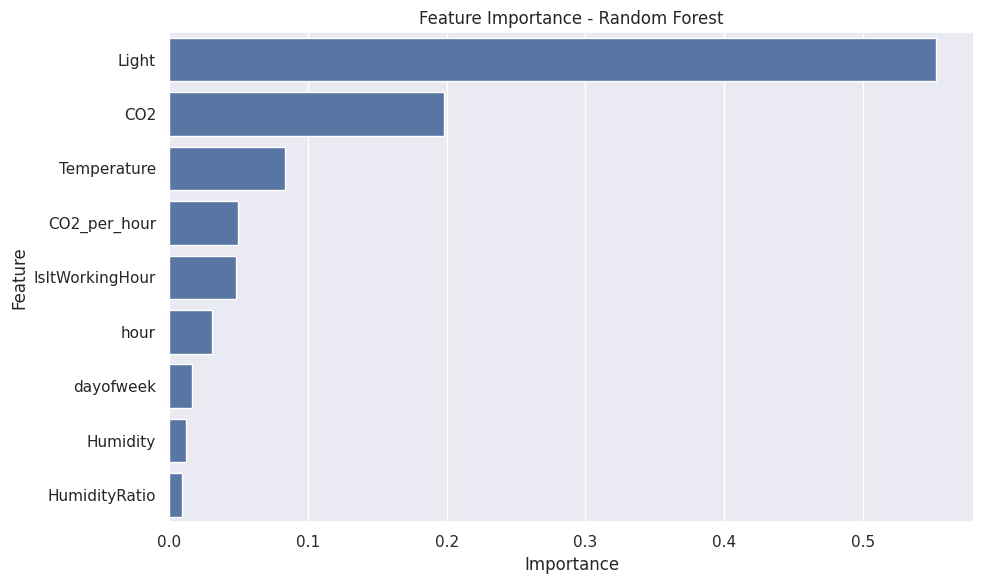

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = random_forest_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#2-e overfitting underfitting

In [ ]:
train_acc_randomforest = accuracy_score(y_train, y_train_pred_random_forest)
test_acc_randomforest = accuracy_score(y_test,y_test_pred_decision_tree)

diff_randomforest = abs(train_acc_randomforest - test_acc_randomforest)
if train_acc_randomforest < 0.85 and test_acc_randomforest < 0.85:
    print("Underfitting: The model did not learn the data enough.")
elif train_acc_decisiontree > 0.85 and diff_randomforest > 0.1:
    print("Overfitting: The model fits the training very well but does not generalize.")
else:
    print("The model is balanced: Neither overfitting nor underfitting is observed.")

The model is balanced: Neither overfitting nor underfitting is observed.


#2-f feature combination

In [ ]:
X_full = temiz_veri.drop("Occupancy", axis=1)
y_full = temiz_veri["Occupancy"]

feature_sets = {
    "Set 1": ['Temperature', 'Humidity'],
    "Set 2": ['Temperature', 'Humidity', 'Light'],
    "Set 3": ['Temperature', 'Humidity', 'Light', 'hour', 'dayofweek'],
    "Set 4": list(X_full.columns)
}

results = []

from sklearn.ensemble import RandomForestClassifier

best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


for name, features in feature_sets.items():
    X = X_full[features]
    y = y_full

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    model = RandomForestClassifier(random_state=42, **best_params)


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Feature Set": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
print(df_results)

  Feature Set  Accuracy  Precision    Recall
0       Set 1  0.969709   0.943359  0.914773
1       Set 2  0.992223   0.975701  0.988636
2       Set 3  0.991404   0.975610  0.984848
3       Set 4  0.993041   0.977570  0.990530


#----------Kernelized Support Vector---------------

#2-b - building model || 2-c tuning hyperparameters and calculation of metrics:


Train accuracy score: 0.9888
Test accuracy score: 0.9889
Model precision score: 0.9563
Model recall score: 0.9943


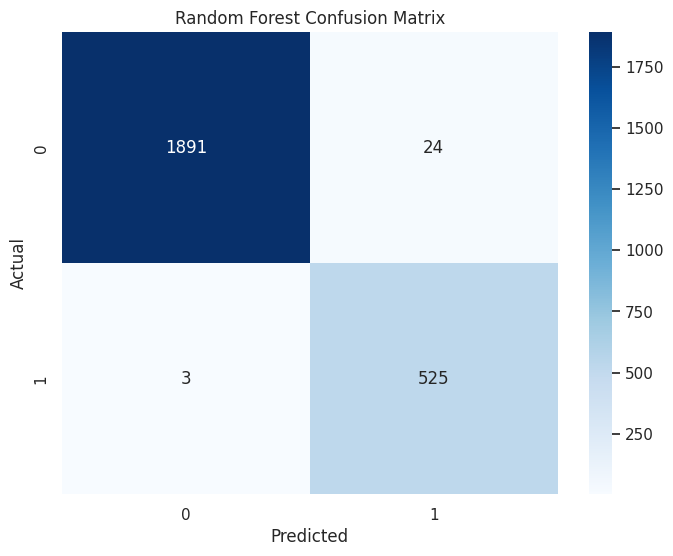


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1915
           1       0.96      0.99      0.97       528

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [ ]:
from sklearn.svm import SVC

kernel_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

kernel_model.fit(X_train, y_train)

y_train_pred_kernel = kernel_model.predict(X_train)
y_test_pred_kernel = kernel_model.predict(X_test)

print('Train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_kernel)))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_kernel)))
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, y_test_pred_kernel)))
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, y_test_pred_kernel)))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_kernel), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_kernel))

#2-d feature importance

There are NO direct feature_importances_ for Kernelized SVM (kernel='rbf', 'poly', 'sigmoid') models. Because SVM with non-linear kernels processes features in a transformed space.

Therefore, it is not possible to calculate directly how much each feature contributes.

#2-e underfitting ve overfitting

In [ ]:
train_acc_kernel = accuracy_score(y_train, y_train_pred_kernel)
test_acc_kernel = accuracy_score(y_test,y_test_pred_kernel)

diff_kernel = abs(train_acc_kernel - test_acc_kernel)
if train_acc_kernel < 0.85 and test_acc_kernel < 0.85:
    print("Underfitting: The model did not learn the data enough.")
elif train_acc_kernel > 0.85 and diff_kernel > 0.1:
    print("Overfitting: The model fits the training very well but does not generalize.")
else:
    print("The model is balanced: Neither overfitting nor underfitting is observed.")

The model is balanced: Neither overfitting nor underfitting is observed.


#2-f feature combination

In [ ]:
from sklearn.svm import SVC

feature_sets = {
    "Set 1": ['Temperature', 'Humidity'],
    "Set 2": ['Temperature', 'Humidity', 'Light'],
    "Set 3": ['Temperature', 'Humidity', 'Light', 'hour', 'dayofweek'],
    "Set 4": list(X_full.columns)
}

results_svm = []

best_params_svm = {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'}

for name, features in feature_sets.items():
    X = X_full[features]
    y = y_full

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = SVC(random_state=42, **best_params_svm)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_svm.append({
        "Feature Set": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

df_results_svm = pd.DataFrame(results_svm)
print(df_results_svm)

  Feature Set  Accuracy  Precision    Recall
0       Set 1  0.906672   0.794118  0.767045
1       Set 2  0.987720   0.952727  0.992424
2       Set 3  0.987720   0.952727  0.992424
3       Set 4  0.988948   0.956284  0.994318


#---------------Neural Networks------------------

#2-b - building model || 2-c tuning hyperparameters and calculation of metrics:


I did hyperparameter tuning but I saw that the variance in the performance graphs was high and I did it with a simpler method:


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


neural_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

neural_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = neural_model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test))

test_loss, test_accuracy = neural_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9197 - loss: 0.9031 - val_accuracy: 0.9562 - val_loss: 0.1040
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9443 - loss: 0.1416 - val_accuracy: 0.9513 - val_loss: 0.1962
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9555 - loss: 0.1173 - val_accuracy: 0.9718 - val_loss: 0.0961
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9593 - loss: 0.1322 - val_accuracy: 0.9668 - val_loss: 0.1450
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9716 - loss: 0.1056 - val_accuracy: 0.9791 - val_loss: 0.0652
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9782 - loss: 0.0680 - val_accuracy: 0.9685 - val_loss: 0.1244
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9686 - loss: 0.1301 - val_accuracy: 0.9533 - val_loss: 0.0977
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9712 - loss: 0.0842 - val_accu

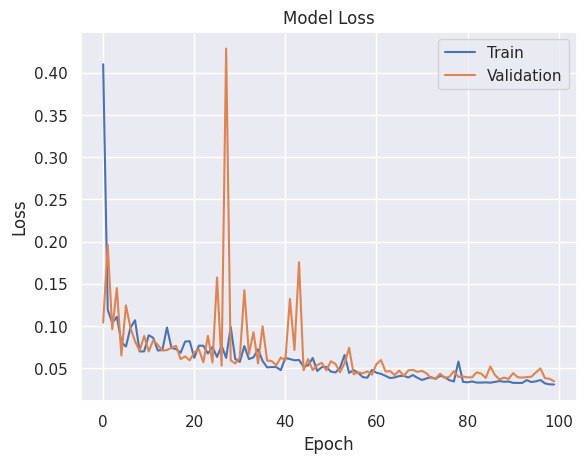

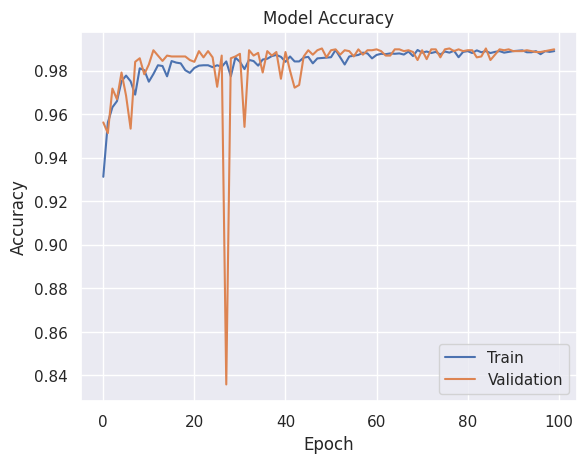

In [ ]:
# Kayıp (Loss) grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Doğruluk (Accuracy) grafiği
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train accuracy score: 0.9893
Test accuracy score: 0.9898
Model precision score: 0.9564
Model recall score: 0.9981


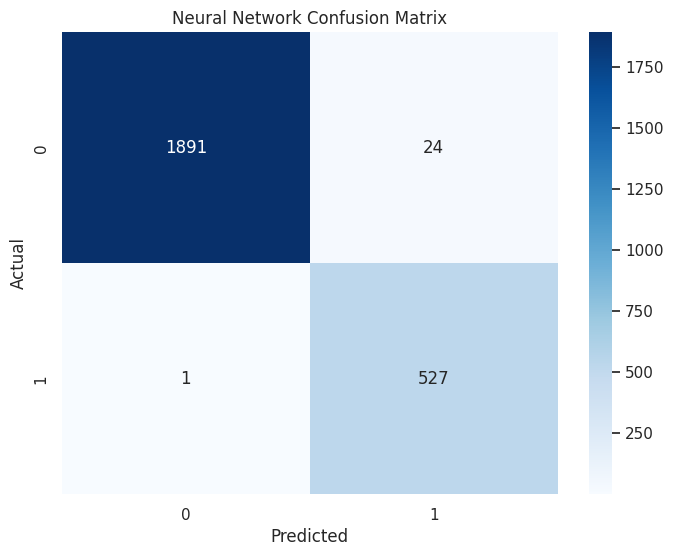


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1915
           1       0.96      1.00      0.98       528

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [ ]:
y_train_pred_neural = neural_model.predict(X_train)
y_train_pred_neural = (y_train_pred_neural > 0.5).astype(int)

y_test_pred_neural = neural_model.predict(X_test)
y_test_pred_neural = (y_test_pred_neural > 0.5).astype(int)


print('Train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_neural)))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_neural)))
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, y_test_pred_neural)))
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, y_test_pred_neural)))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_neural), annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_neural))

In [ ]:
train_acc_neural = accuracy_score(y_train, y_train_pred_neural)
test_acc_neural = accuracy_score(y_test,y_test_pred_neural)

diff_neural = abs(train_acc_neural - test_acc_neural)
if train_acc_neural < 0.85 and test_acc_neural < 0.85:
    print("Underfitting: The model did not learn the data enough.")
elif train_acc_neural > 0.85 and diff_neural > 0.1:
    print("Overfitting: The model fits the training very well but does not generalize.")
else:
    print("The model is balanced: Neither overfitting nor underfitting is observed.")

The model is balanced: Neither overfitting nor underfitting is observed.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense


feature_sets = {
    "Set 1": ['Temperature', 'Humidity'],
    "Set 2": ['Temperature', 'Humidity', 'Light'],
    "Set 3": ['Temperature', 'Humidity', 'Light', 'hour', 'dayofweek'],
    "Set 4": list(X_full.columns)  # Tüm özellikler
}

results_nn = []

EPOCHS = 50
BATCH_SIZE = 32
UNITS = 32

for name, features in feature_sets.items():
    X = X_full[features]
    y = y_full

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = Sequential([
        Dense(UNITS, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(UNITS, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)  # sigmoid çıktısını 0/1'e çevir

    results_nn.append({
        "Feature Set": name,
        "Accuracy": accuracy_score(y_test, y_pred_binary),
        "Precision": precision_score(y_test, y_pred_binary),
        "Recall": recall_score(y_test, y_pred_binary)
    })

df_nn_results = pd.DataFrame(results_nn)
print(df_nn_results)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  Feature Set  Accuracy  Precision    Recall
0       Set 1  0.813344   0.939024  0.145833
1       Set 2  0.986901   0.949275  0.992424
2       Set 3  0.988129   0.951175  0.996212
3       Set 4  0.985264   0.936170  1.000000
